In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [3]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
df_train.columns = [col.lower().replace(' ','_') for col in df_train.columns]
df_test.columns = [col.lower().replace(' ','_') for col in df_test.columns]

In [6]:
df_train.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
garage_cars          1
garage_area          1
bsmtfin_sf_1         1
dtype: int64

In [7]:
df_test.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
bsmt_cond          25
bsmt_qual          25
mas_vnr_area        1
mas_vnr_type        1
electrical          1
dtype: int64

In [8]:
print(df_train['pool_area'].value_counts())
print(df_train['pool_qc'].value_counts())
print(df_test['pool_area'].value_counts())
print(df_test['pool_qc'].value_counts())

0      2042
519       1
576       1
800       1
228       1
480       1
648       1
738       1
368       1
561       1
Name: pool_area, dtype: int64
Gd    4
Fa    2
TA    2
Ex    1
Name: pool_qc, dtype: int64
0      874
144      1
555      1
512      1
444      1
Name: pool_area, dtype: int64
Ex    3
TA    1
Name: pool_qc, dtype: int64


In [9]:
#misc_feature      1986
#alley             1911
#fence             1651
#fireplace_qu      1000
#garage_yr_blt      114
#garage_cond        114
#garage_qual        114
#garage_finish      114
#garage_type        113
#bsmt_exposure       58
#bsmtfin_type_2      56
#bsmt_cond           55
#bsmt_qual           55
#bsmtfin_type_1      55
#mas_vnr_area        22
#mas_vnr_type        22
#bsmt_half_bath       2
#bsmt_full_bath       2
#total_bsmt_sf        1
#bsmt_unf_sf          1
#bsmtfin_sf_2         1
#garage_cars          1
#garage_area          1
#bsmtfin_sf_1         1

In [10]:
# frontage - interpolate based on size and type of lot

##  PID

In [11]:
#  Property IDs in Story County are made of groups...

#  https://www.storycountyiowa.gov/DocumentCenter/View/6074/A-Guide-to-Geo-Numbering-in-Story-County?bidId=

for df in [df_train,df_test]:
    df['pid_1'] = df['pid'].astype('str').str[:1].astype('int')
    df['pid_2'] = df['pid'].astype('str').str[1:3].astype('int')
    df['pid_3'] = df['pid'].astype('str').str[3:6].astype('int')
    df['pid_4'] = df['pid'].astype('str').str[6:9].astype('int')
    df.drop(columns='pid',inplace=True)

##  MS Subclass

In [12]:
#  Not numeric!!!

## MS Zoning

In [13]:
df_train['ms_zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [14]:
df_train.groupby(['ms_zoning'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
ms_zoning,,,,,,,,
A (agr),2.0,47300.000000,48366.103833,13100.0,30200.0,47300.0,64400.0,81500.0
C (all),19.0,78010.894737,32781.478897,34900.0,50913.5,75000.0,105388.0,140000.0
FV,101.0,218618.316832,53063.423791,144152.0,176500.0,208900.0,254900.0,370878.0
I (all),1.0,57625.000000,NaN,57625.0,57625.0,57625.0,57625.0,57625.0
RH,14.0,148859.571429,35970.877401,82000.0,128500.0,152217.0,180000.0,200000.0
RL,1598.0,191235.164581,80380.790716,35000.0,137500.0,172500.0,222375.0,611657.0
RM,316.0,129119.142405,50776.911622,12789.0,103300.0,123900.0,141500.0,475000.0


In [15]:
for df in [df_train,df_test]:
    df['ms_zoning'] = [0 if val == 'A (agr)' 
                         else 1 if val == 'I (all)' 
                         else 2 if val == 'C (all)'
                         else 3 if val == 'RH'
                         else 4 if val == 'RM'
                         else 5 if val == 'RL'
                         else 6
                         for val in df['ms_zoning']]

## Lot Frontage

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lot_frontage', ylabel='lot_area'>

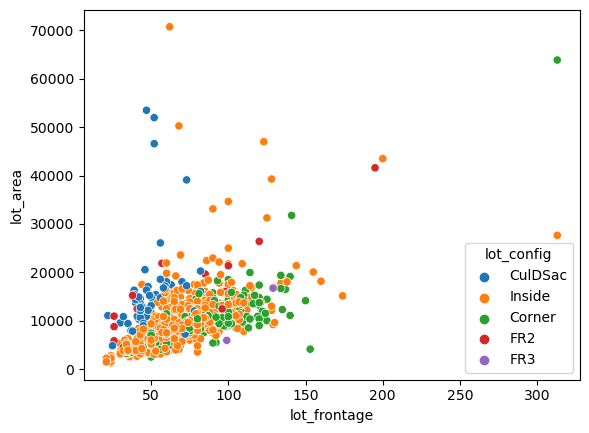

In [16]:
sns.scatterplot(df_train['lot_frontage'],df_train['lot_area'],hue=df_train['lot_config'])

In [17]:
#for df in [df_train,df_test]:
 #   df['lot_config'] = [0 if val == 'FR3'
  #                     else 1 if val == 'FR2'
   #                    else 2 if val == 'Corner'
    #                    else 3 if val == 'Inside'
     #                   else 4
      #                 for val in df['lot_config']]

In [18]:
#X = df_train.loc[df_train['lot_frontage'] > 0, ['lot_area','lot_config']]
#y = df_train.loc[df_train['lot_frontage'] > 0, 'lot_frontage']
#X_val = df_train.loc[df_train['lot_frontage'] == 0, ['lot_area','lot_config']]
#y_val = df_train.loc[df_train['lot_frontage'] == 0, 'lot_frontage']

#X,y,X_val,y_val = train_test_split(X,y,random_state=42)

In [19]:
#  https://www.storycountyiowa.gov/DocumentCenter/View/6074/A-Guide-to-Geo-Numbering-in-Story-County?bidId=

## Lot Area

In [20]:
df_train['lot_area'].describe()

count      2051.000000
mean      10065.208191
std        6742.488909
min        1300.000000
25%        7500.000000
50%        9430.000000
75%       11513.500000
max      159000.000000
Name: lot_area, dtype: float64

## Street

In [21]:
df_train['street'].value_counts()

Pave    2044
Grvl       7
Name: street, dtype: int64

In [22]:
df_train.groupby(['street'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
street,,,,,,,,
Grvl,7.0,86901.428571,38339.739652,50138.0,56809.0,78000.0,106175.0,154204.0
Pave,2044.0,181793.565558,79173.195670,12789.0,129975.0,163000.0,214000.0,611657.0


In [23]:
for df in [df_train,df_test]:
    df['street'] = [0 if val == 'Grvl' else 1 for val in df['street']]

## Alley

In [24]:
df_train['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [25]:
df_train.groupby(['alley'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
alley,,,,,,,,
Grvl,85.0,120835.635294,35647.047030,35000.0,99900.0,118000.0,142900.0,256000.0
Pave,55.0,174534.709091,46295.412205,40000.0,152000.0,172500.0,193900.0,345000.0


In [26]:
for df in [df_train,df_test]:
    df['alley'] = [0 if val == 'Grvl' else 1 for val in df['alley']]

## Lot Shape

In [27]:
###### ?????

df_train['lot_shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: lot_shape, dtype: int64

In [28]:
df_train.groupby(['lot_shape'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
lot_shape,,,,,,,,
IR1,692.0,211848.670520,83359.764142,52000.0,157000.0,190000.0,250000.0,611657.0
IR2,55.0,233954.745455,89824.066055,109000.0,174000.0,217500.0,247700.0,538000.0
IR3,9.0,193182.222222,58500.737982,73000.0,163500.0,192140.0,220000.0,267000.0
Reg,1295.0,162925.812355,70198.139114,12789.0,120000.0,145000.0,185492.5,582933.0


In [29]:
for df in [df_train,df_test]:
    df['lot_shape'] = [0 if val == 'IR3' 
                         else 1 if val == 'IR2' 
                         else 2 if val == 'IR1'
                         else 3
                         for val in df['lot_shape']]

## Land Contour

In [30]:
df_train['land_contour'].value_counts()

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: land_contour, dtype: int64

In [31]:
df_train.groupby(['land_contour'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
land_contour,,,,,,,,
Bnk,80.0,142868.775000,49275.865018,52500.0,109625.0,137250.0,170000.0,315000.0
HLS,85.0,262353.376471,116726.453660,79275.0,173000.0,242000.0,355000.0,552000.0
Low,43.0,199313.116279,82609.276243,13100.0,143500.0,207000.0,270000.0,385000.0
Lvl,1843.0,178998.564840,75697.224509,12789.0,129500.0,161000.0,211000.0,611657.0


In [32]:
for df in [df_train,df_test]:
    df['land_contour'] = [0 if val == 'Bnk' 
                         else 1 if val == 'Lvl' 
                         else 2 if val == 'Low'
                         else 3
                         for val in df['land_contour']]

## Utilities

In [33]:
df_train['utilities'].value_counts()

AllPub    2049
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

In [34]:
df_train.groupby(['utilities'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
utilities,,,,,,,,
AllPub,2049.0,181551.602245,79244.116778,12789.0,129850.0,162500.0,214000.0,611657.0
NoSeWa,1.0,137500.000000,NaN,137500.0,137500.0,137500.0,137500.0,137500.0
NoSewr,1.0,57625.000000,NaN,57625.0,57625.0,57625.0,57625.0,57625.0


In [35]:
for df in [df_train,df_test]:
    df['utilities'] = [0 if (val == 'NoSeWa') | (val == 'NoSeWr')
                       else 1
                       for val in df['utilities']]

## Lot Config

In [36]:
df_train['lot_config'].value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lot_config, dtype: int64

In [37]:
df_train.groupby(['lot_config'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
lot_config,,,,,,,,
Corner,348.0,180629.591954,74223.005036,44000.0,132000.0,161000.0,218209.0,468000.0
CulDSac,131.0,230744.358779,98419.411679,80000.0,158000.0,215000.0,269000.0,591587.0
FR2,60.0,174703.600000,60125.817532,81000.0,132500.0,162250.0,195750.0,394617.0
FR3,9.0,198600.000000,91734.412845,79000.0,119900.0,207000.0,296000.0,315000.0
Inside,1503.0,177537.014637,77749.368500,12789.0,128000.0,159000.0,206740.0,611657.0


In [38]:
plt.hist(y=df_train['saleprice'],x=df_train['lot_config'])


(array([ 131.,    0., 1503.,    0.,    0.,  348.,    0.,   60.,    0.,
           9.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


ValueError: setting an array element with a sequence.

<Figure size 640x480 with 1 Axes>

In [39]:
for df in [df_train,df_test]:
    df['lot_config'] = [0 if val == 'FR3'
                       else 1 if val == 'FR2'
                       else 2 if val == 'Corner'
                        else 3 if val == 'Inside'
                        else 4
                       for val in df['lot_config']]

## Land Slope

In [40]:
df_train['land_slope'].value_counts()

Gtl    1953
Mod      88
Sev      10
Name: land_slope, dtype: int64

In [41]:
df_train.groupby(['land_slope'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
land_slope,,,,,,,,
Gtl,1953.0,180358.476703,77897.279103,12789.0,129500.0,161000.0,212900.0,611657.0
Mod,88.0,204639.465909,102651.673838,13100.0,135125.0,188250.0,257682.0,552000.0
Sev,10.0,194598.000000,85068.824659,61000.0,131250.0,200750.0,270750.0,302000.0


In [42]:
for df in [df_train,df_test]:
    df['land_slope'] = [0 if val == 'Sev'
                       else 1 if val == 'Gtl'
                       else 2
                       for val in df['land_slope']]

## Neighborhood

In [43]:
df['neighborhood'].value_counts()

NAmes      133
CollgCr     87
OldTown     76
Somerst     52
Edwards     50
Gilbert     49
NridgHt     44
NWAmes      44
Sawyer      40
SawyerW     38
Mitchel     32
Crawfor     32
BrkSide     32
Timber      24
IDOTRR      24
NoRidge     23
ClearCr     17
SWISU       16
MeadowV     13
StoneBr     13
BrDale      11
Veenker      7
Blmngtn      6
NPkVill      6
Greens       5
Blueste      4
Name: neighborhood, dtype: int64

## Proximity to "Conditions"

In [44]:
df_train.groupby(['condition_1'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
condition_1,,,,,,,,
Artery,70.0,128765.000000,58285.726961,50000.0,103150.0,118950.0,140750.0,475000.0
Feedr,109.0,143223.605505,45259.511847,35000.0,119600.0,140000.0,160000.0,269500.0
Norm,1767.0,185007.310130,79593.264680,12789.0,131125.0,167000.0,218000.0,611657.0
PosA,12.0,254733.333333,91755.092337,185000.0,188425.0,216000.0,276425.0,455000.0
PosN,27.0,254794.296296,117428.552257,109500.0,172000.0,214500.0,295500.0,591587.0
RRAe,21.0,139685.714286,21115.617105,87000.0,129000.0,142500.0,150000.0,184000.0
RRAn,36.0,172604.777778,55498.209382,79500.0,140150.0,167250.0,187460.0,336820.0
RRNe,3.0,129616.666667,37705.315717,93850.0,109925.0,126000.0,147500.0,169000.0
RRNn,6.0,198208.333333,76223.096347,128000.0,134687.5,184000.0,237250.0,320000.0


In [45]:
df_train.groupby(['condition_2'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
condition_2,,,,,,,,
Artery,5.0,119050.000000,19445.757892,95000.0,108000.0,118000.0,128250.0,146000.0
Feedr,11.0,129181.818182,40785.581231,79500.0,99500.0,128000.0,143250.0,220000.0
Norm,2025.0,181382.075556,78604.763227,12789.0,130000.0,163000.0,214000.0,611657.0
PosA,3.0,390666.666667,65010.255601,325000.0,358500.0,392000.0,423500.0,455000.0
PosN,3.0,395666.666667,67633.817971,334000.0,359500.0,385000.0,426500.0,468000.0
RRAe,1.0,190000.000000,NaN,190000.0,190000.0,190000.0,190000.0,190000.0
RRAn,1.0,136905.000000,NaN,136905.0,136905.0,136905.0,136905.0,136905.0
RRNn,2.0,96750.000000,39951.533137,68500.0,82625.0,96750.0,110875.0,125000.0


In [46]:
df_train['condition_1'].value_counts()

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: condition_1, dtype: int64

In [47]:
#  Apparently E-W is worse
#  Rethink this one

for df in [df_train,df_test]:
    for cond in ['condition_1','condition_2']:
        df[cond] = [0 if (val == 'RRAe') | (val == 'RRNe')
                    else 1 if (val == 'RRAn') | (val == 'RRNn')
                    else 2 if val == 'Artery'
                    else 3 if val == 'Feedr'
                    else 4 if val == 'Normal'
                    else 5 if val == 'PosN'
                    else 6 
                    for val in df[cond]]

## Building Type

In [48]:
df_train.groupby(['bldg_type'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
bldg_type,,,,,,,,
1Fam,1700.0,185275.685882,81912.397035,12789.0,130500.0,165200.0,219282.5,611657.0
2fmCon,46.0,123179.891304,30304.813341,55000.0,101187.5,121200.0,139875.0,200000.0
Duplex,75.0,139296.333333,40824.044796,62500.0,118250.0,136000.0,148991.5,269500.0
Twnhs,69.0,133100.000000,37977.260030,73000.0,100000.0,134000.0,160000.0,230000.0
TwnhsE,161.0,198312.372671,65866.184832,79400.0,147000.0,184000.0,234250.0,392500.0


In [49]:
for df in [df_train,df_test]:
    df['bldg_type'] = [0 if val == '2fmCon'
                       else 1 if val == 'Twnhs'
                       else 2 if val == 'Duplex'
                       else 3 
                       for val in df['bldg_type']]

## House Style (floors)

In [50]:
df_train['house_style'].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64

In [51]:
df_train.groupby(['house_style'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
house_style,,,,,,,,
1.5Fin,218.0,136480.091743,44910.975892,37900.0,113250.00,128700.0,149375.0,410000.0
1.5Unf,12.0,112466.666667,21111.364166,64500.0,107925.00,113000.0,122250.0,139400.0
1Story,1059.0,179809.194523,81725.146760,12789.0,128000.00,156000.0,214000.0,611657.0
2.5Fin,6.0,243666.666667,128464.262216,104000.0,192500.00,198500.0,271250.0,475000.0
2.5Unf,14.0,191785.714286,87041.483100,101000.0,133125.00,165500.0,212125.0,415000.0
2Story,598.0,206408.963211,82240.431218,40000.0,152768.75,189000.0,243875.0,584500.0
SFoyer,50.0,149343.920000,31859.449693,73000.0,130475.00,147500.0,169625.0,224500.0
SLvl,94.0,166248.989362,37262.422556,91000.0,145000.00,164750.0,177875.0,345000.0


In [52]:
## rethink

for df in [df_train,df_test]:
    df['house_style'] = [0 if val == '1Story'
                         else 1 if val == '1.5Unf'
                         else 2 if val == '1.5Fin'
                         else 3 if val == 'SLvl'
                         else 4 if val == 'SFoyer'
                         else 5 if val == '2Story'
                         else 6 if val == '2.5Unf'
                         else 7
                       for val in df['house_style']]

## Quality/Condition Columns - Ordinal Numeric

In [53]:
df_train['overall_qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: overall_qual, dtype: int64

In [54]:
df_train['overall_cond'].value_counts()

5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: overall_cond, dtype: int64

## Quality/Conditions - Ordinal Non-Numeric

In [55]:
for col in ['exter_qual','exter_cond','bsmt_qual','bsmt_cond','heating_qc','kitchen_qual','fireplace_qu','garage_qual','garage_cond','pool_qc']:
    print(df[col].value_counts())

TA    552
Gd    292
Ex     25
Fa      9
Name: exter_qual, dtype: int64
TA    770
Gd     84
Fa     18
Ex      5
Po      1
Name: exter_cond, dtype: int64
TA    396
Gd    355
Ex     73
Fa     28
Po      1
Name: bsmt_qual, dtype: int64
TA    781
Fa     39
Gd     33
Name: bsmt_cond, dtype: int64
Ex    429
TA    267
Gd    157
Fa     25
Name: heating_qc, dtype: int64
TA    447
Gd    354
Ex     53
Fa     23
Po      1
Name: kitchen_qual, dtype: int64
Gd    220
TA    193
Fa     16
Po     15
Ex     12
Name: fireplace_qu, dtype: int64
TA    782
Fa     42
Gd      6
Po      3
Name: garage_qual, dtype: int64
TA    796
Fa     27
Po      6
Gd      3
Ex      1
Name: garage_cond, dtype: int64
Ex    3
TA    1
Name: pool_qc, dtype: int64


In [56]:
for df in [df_train,df_test]:
    for col in ['exter_qual','exter_cond','bsmt_qual','bsmt_cond',
                'heating_qc','kitchen_qual','fireplace_qu','garage_qual','garage_cond','pool_qc']:
        df[col] = [0 if val == 'NA'
                   else 1 if val == 'Po'
                   else 2 if val == 'Fa'
                   else 3 if val == 'TA'
                   else 4 if val == 'Gd'
                   else 5
                   for val in df[col]]

## Year Built/Remod

In [57]:
df_train['year_built'].describe()

count    2051.000000
mean     1971.708922
std        30.177889
min      1872.000000
25%      1953.500000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: year_built, dtype: float64

In [58]:
df_train['year_remod/add'].describe()

count    2051.000000
mean     1984.190151
std        21.036250
min      1950.000000
25%      1964.500000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: year_remod/add, dtype: float64

##  Roof

In [59]:
df_train['roof_style'].value_counts()

Gable      1619
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: roof_style, dtype: int64

In [60]:
df_train.groupby(['roof_style'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
roof_style,,,,,,,,
Flat,13.0,191613.076923,61659.734752,113500.0,129000.0,167000.0,242000.0,274970.0
Gable,1619.0,171264.253243,64948.908434,12789.0,128000.0,159000.0,203000.0,475000.0
Gambrel,12.0,138208.333333,66068.524459,40000.0,93725.0,125250.0,172500.0,259500.0
Hip,397.0,224366.654912,112153.404004,50138.0,140000.0,180500.0,290000.0,611657.0
Mansard,7.0,152642.857143,80646.716344,44000.0,108500.0,150000.0,182500.0,292500.0
Shed,3.0,208666.666667,63105.731383,157000.0,173500.0,190000.0,234500.0,279000.0


In [61]:
df_train['roof_matl'].value_counts()

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: roof_matl, dtype: int64

In [62]:
df_train.groupby(['roof_matl'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
roof_matl,,,,,,,,
ClyTile,1.0,160000.000000,NaN,160000.0,160000.0,160000.0,160000.0,160000.0
CompShg,2025.0,180849.197037,79013.718606,12789.0,129500.0,161500.0,213000.0,611657.0
Membran,1.0,241500.000000,NaN,241500.0,241500.0,241500.0,241500.0,241500.0
Tar&Grv,15.0,187948.933333,56957.886372,113500.0,137000.0,167000.0,246382.0,274970.0
WdShake,4.0,264250.000000,49562.250420,190000.0,262750.0,287250.0,288750.0,292500.0
WdShngl,5.0,339400.000000,88618.846754,278000.0,279000.0,280000.0,385000.0,475000.0


## Exterior

In [63]:
df_train['exterior_1st'].value_counts()

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
Stone        2
CBlock       2
ImStucc      1
AsphShn      1
Name: exterior_1st, dtype: int64

In [64]:
df_train['exterior_2nd'].value_counts()

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: exterior_2nd, dtype: int64

## Masonry

In [65]:
df_train['mas_vnr_type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [66]:
df_train.groupby(['mas_vnr_type'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
mas_vnr_type,,,,,,,,
BrkCmn,13.0,144515.692308,48114.563297,82500.0,118500.0,139000.0,163000.0,277000.0
BrkFace,630.0,212161.436508,82499.362028,75000.0,155000.0,188700.0,256000.0,591587.0
None,1218.0,153679.275862,55719.475261,12789.0,120000.0,143000.0,180000.0,475000.0
Stone,168.0,263714.702381,107263.569424,99000.0,182487.5,247164.0,320600.0,611657.0


In [67]:
df_train['mas_vnr_area'].describe()

count    2029.000000
mean       99.695909
std       174.963129
min         0.000000
25%         0.000000
50%         0.000000
75%       161.000000
max      1600.000000
Name: mas_vnr_area, dtype: float64

## Foundation

In [68]:
df_train['foundation'].value_counts()

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: foundation, dtype: int64

In [69]:
df_train.groupby(['foundation'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
foundation,,,,,,,,
BrkTil,221.0,129050.190045,52575.623606,12789.0,102000.0,125500.0,149000.0,475000.0
CBlock,863.0,148415.530707,45533.429909,34900.0,122950.0,140750.0,166500.0,410000.0
PConc,926.0,227676.483801,84921.003596,63000.0,173000.0,209000.0,267762.0,611657.0
Slab,34.0,108810.676471,47921.039902,13100.0,88100.0,102350.0,129500.0,284700.0
Stone,5.0,143235.200000,71450.251191,89000.0,102776.0,118000.0,139900.0,266500.0
Wood,2.0,173750.000000,39951.533137,145500.0,159625.0,173750.0,187875.0,202000.0


## Basement

### -- Exposure

In [70]:
df_train['bsmt_exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64

In [71]:
df_train.groupby(['bsmt_exposure'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
bsmt_exposure,,,,,,,,
Av,288.0,206262.451389,82130.408408,35311.0,148000.0,186325.0,249175.0,591587.0
Gd,203.0,271610.566502,109600.224614,61000.0,185000.0,250764.0,335750.0,611657.0
Mn,163.0,189377.570552,73187.465263,68000.0,137700.0,170000.0,223250.0,475000.0
No,1339.0,164533.532487,61183.819878,12789.0,125800.0,150000.0,190000.0,535000.0


In [72]:
for df in [df_train,df_test]:
    df['bsmt_exposure'] = [0 if val == 'NA'
                           else 1 if val == 'No'
                           else 2 if val == 'Mn'
                           else 3 if val == 'Av'
                           else 4 
                           for val in df['bsmt_exposure']]

### -- Finish (Type 1/2)

In [73]:
print(df_train['bsmtfin_type_1'].value_counts())
print(df_train['bsmtfin_type_2'].value_counts())

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64
Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64


In [74]:
df_train.groupby(['bsmtfin_type_1'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
bsmtfin_type_1,,,,,,,,
ALQ,293.0,164368.017065,50942.184107,79275.0,130500.0,152500.0,180000.0,538000.0
BLQ,200.0,150107.020000,43436.441698,35311.0,125375.0,142500.0,163750.0,345000.0
GLQ,615.0,237597.245528,87455.995175,73000.0,177000.0,217000.0,284500.0,611657.0
LwQ,102.0,153266.921569,51833.183880,61500.0,123125.0,139000.0,171750.0,315000.0
Rec,183.0,143263.382514,51214.300952,34900.0,120000.0,135000.0,157250.0,584500.0
Unf,603.0,166155.257048,72618.244750,12789.0,117800.0,155835.0,193500.0,582933.0


In [75]:
df_train.groupby(['bsmtfin_type_2'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
bsmtfin_type_2,,,,,,,,
ALQ,35.0,188567.142857,91516.726969,99500.0,129100.0,162000.0,212750.00,555000.0
BLQ,48.0,156659.020833,55564.508874,62383.0,124875.0,140500.0,174625.00,417500.0
GLQ,23.0,221300.000000,103403.449696,84500.0,150450.0,217500.0,255750.00,584500.0
LwQ,60.0,162284.583333,42446.920765,88000.0,135500.0,154000.0,178468.75,287000.0
Rec,80.0,164538.750000,54047.229097,85000.0,134100.0,151750.0,174212.50,402000.0
Unf,1749.0,185221.284162,80445.614944,12789.0,130000.0,167000.0,219000.00,611657.0


In [76]:
for df in [df_train,df_test]:
    for col in ['bsmtfin_type_1','bsmtfin_type_2']:
        df[col] = [0 if val == 'NA'
                   else 1 if val == 'Unf'
                   else 2 if val == 'LwQ'
                   else 3 if val == 'Rec'
                   else 4 if val == 'BLQ'
                   else 5 if val == 'ALQ'
                   else 6
                   for val in df[col]]

### -- Square Footage

In [77]:
df_train['bsmtfin_sf_1'].value_counts()

0.0       657
24.0       17
16.0       10
384.0       7
20.0        7
         ... 
380.0       1
223.0       1
631.0       1
1053.0      1
155.0       1
Name: bsmtfin_sf_1, Length: 821, dtype: int64

In [78]:
df_train['bsmtfin_sf_2'].value_counts()

0.0       1803
294.0        5
483.0        3
72.0         3
180.0        3
          ... 
132.0        1
829.0        1
1127.0       1
435.0        1
750.0        1
Name: bsmtfin_sf_2, Length: 205, dtype: int64

In [79]:
df_train['bsmt_unf_sf'].value_counts()

0.0      165
384.0     14
672.0     11
728.0     10
816.0      9
        ... 
988.0      1
42.0       1
793.0      1
60.0       1
994.0      1
Name: bsmt_unf_sf, Length: 967, dtype: int64

In [80]:
df_train['total_bsmt_sf'].value_counts()

0.0       54
864.0     51
672.0     20
1040.0    20
912.0     17
          ..
1508.0     1
1840.0     1
423.0      1
2461.0     1
1932.0     1
Name: total_bsmt_sf, Length: 892, dtype: int64

## Heating

In [81]:
df_train['heating'].value_counts()

GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: heating, dtype: int64

In [82]:
df_train.groupby('heating')['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
heating,,,,,,,,
GasA,2018.0,182422.47671,79248.446956,12789.0,130000.0,163500.0,214800.0,611657.0
GasW,20.0,151275.00000,48576.438679,85000.0,123125.0,140000.0,168250.0,256000.0
Grav,5.0,65180.00000,18998.342033,37900.0,52500.0,76500.0,79000.0,80000.0
OthW,2.0,125750.00000,5303.300859,122000.0,123875.0,125750.0,127625.0,129500.0
Wall,6.0,77150.00000,31860.618324,13100.0,82925.0,88750.0,92175.0,98000.0


## Air Conditioning

In [83]:
df_train['central_air'].value_counts()

Y    1910
N     141
Name: central_air, dtype: int64

In [84]:
for df in [df_train,df_test]:
    df['central_air'] = [1 if val == 'Y' else 0 for val in df['central_air']]

## Electricity

In [85]:
df_train['electrical'].value_counts()

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

In [86]:
df_train.groupby('electrical')['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
electrical,,,,,,,,
FuseA,140.0,122565.157143,38633.134013,13100.0,99875.0,122875.0,144250.0,239000.0
FuseF,35.0,103678.914286,30466.232529,35000.0,82437.5,105000.0,129000.0,169500.0
FuseP,7.0,83485.714286,22430.665659,64500.0,70500.0,75000.0,86950.0,130000.0
Mix,1.0,67000.000000,NaN,67000.0,67000.0,67000.0,67000.0,67000.0
SBrkr,1868.0,187770.382227,79446.058855,12789.0,134900.0,170000.0,220000.0,611657.0


In [87]:
for df in [df_train,df_test]:
    df['electrical'] = [0 if val == 'Mix'
                        else 1 if val == 'FuseP'
                        else 2 if val == 'FuseF'
                        else 3 if val == 'FuseA'
                        else 4
                        for val in df['electrical']]

## Square Footage

In [88]:
df_train[['1st_flr_sf','2nd_flr_sf','low_qual_fin_sf','gr_liv_area']].describe()

,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area
count,2051.000000,2051.000000,2051.000000,2051.000000
mean,1164.488055,329.329108,5.512921,1499.330083
std,396.446923,425.671046,51.068870,500.447829
min,334.000000,0.000000,0.000000,334.000000
25%,879.500000,0.000000,0.000000,1129.000000
50%,1093.000000,0.000000,0.000000,1444.000000
75%,1405.000000,692.500000,0.000000,1728.500000
max,5095.000000,1862.000000,1064.000000,5642.000000


## Bathrooms

In [89]:
df_train[['bsmt_full_bath','bsmt_half_bath','full_bath','half_bath']].describe()

,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath
count,2049.000000,2049.000000,2051.000000,2051.000000
mean,0.427526,0.063446,1.577279,0.371039
std,0.522673,0.251705,0.549279,0.501043
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000
75%,1.000000,0.000000,2.000000,1.000000
max,3.000000,2.000000,4.000000,2.000000


## Discrete Values (Rooms, Fireplaces)

In [90]:
df_train.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish',

In [91]:
df_train[['bedroom_abvgr','kitchen_abvgr','totrms_abvgrd','fireplaces']].describe()

,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces
count,2051.000000,2051.000000,2051.000000,2051.000000
mean,2.843491,1.042906,6.435885,0.590931
std,0.826618,0.209790,1.560225,0.638516
min,0.000000,0.000000,2.000000,0.000000
25%,2.000000,1.000000,5.000000,0.000000
50%,3.000000,1.000000,6.000000,1.000000
75%,3.000000,1.000000,7.000000,1.000000
max,8.000000,3.000000,15.000000,4.000000


## Functionality

In [92]:
df_train['functional'].value_counts()

Typ     1915
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: functional, dtype: int64

In [93]:
df_train.groupby('functional')['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
functional,,,,,,,,
Maj1,12.0,163106.166667,54563.184907,61000.0,133000.0,147700.0,200531.00,275000.0
Maj2,7.0,87157.714286,37181.726469,52000.0,66000.0,68104.0,100000.00,158000.0
Min1,42.0,154429.761905,48195.569336,57625.0,127750.0,148250.0,177343.75,315000.0
Min2,42.0,150424.571429,52177.996640,63900.0,118500.0,143400.0,164612.50,316600.0
Mod,29.0,148108.724138,92052.265979,51689.0,107500.0,128000.0,155000.00,538000.0
Sal,2.0,31550.000000,26092.240226,13100.0,22325.0,31550.0,40775.00,50000.0
Sev,2.0,95750.000000,47022.600949,62500.0,79125.0,95750.0,112375.00,129000.0
Typ,1915.0,183954.749347,79669.717839,12789.0,130000.0,165000.0,216918.50,611657.0


In [94]:
for df in [df_train,df_test]:
    df['functional'] = [0 if val == 'Sal'
                        else 1 if val == 'Sev'
                        else 2 if val == 'Maj2'
                        else 3 if val == 'Maj1'
                        else 4 if val == 'Mod'
                        else 5 if val == 'Min2'
                        else 6 if val == 'Min1'
                        else 7
                        for val in df['functional']]

## Garage

### -- Type

In [95]:
df_train['garage_type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [96]:
df_train.groupby('garage_type')['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
garage_type,,,,,,,,
2Types,19.0,157184.210526,33828.017040,87000.0,143050.00,150000.0,170500.0,235000.0
Attchd,1213.0,205040.195383,76940.432090,13100.0,150000.00,185850.0,238500.0,611657.0
Basment,27.0,143242.333333,39079.659751,55993.0,122875.00,145000.0,159000.0,235000.0
BuiltIn,132.0,247883.522727,99764.995090,91000.0,176954.25,221900.0,292809.0,582933.0
CarPort,11.0,103823.545455,19675.502999,82000.0,89375.00,101800.0,108479.5,148000.0
Detchd,536.0,132132.947761,40575.547690,12789.0,110000.00,129500.0,147425.0,475000.0


In [97]:
for df in [df_train,df_test]:
    df['garage_type'] = [0 if val == 'NA'
                         else 1 if val == 'CarPort'
                         else 2 if val == 'Detchd'
                         else 3 if (val == 'Basment') | (val == '2Types')
                         else 4 if val == 'Attchd'
                         else 5
                         for val in df['garage_type']]

### -- Finish

In [98]:
df_train['garage_finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: garage_finish, dtype: int64

In [99]:
df_train.groupby('garage_finish')['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
garage_finish,,,,,,,,
Fin,509.0,239800.664047,90474.520620,102900.0,175000.0,215000.0,287000.0,611657.0
RFn,579.0,204792.036269,69739.691832,50138.0,156250.0,190550.0,235064.0,584500.0
Unf,849.0,140718.148410,44434.590021,12789.0,115400.0,135000.0,157000.0,475000.0


In [100]:
for df in [df_train,df_test]:
    df['garage_finish'] = [0 if val == 'NA'
                           else 1 if val == 'Unf'
                           else 2 if val == 'RFn'
                           else 3
                           for val in df['garage_finish']]

### -- Size (Cars, Area)

In [101]:
df_train[['garage_cars','garage_area']].describe()

,garage_cars,garage_area
count,2050.000000,2050.000000
mean,1.776585,473.671707
std,0.764537,215.934561
min,0.000000,0.000000
25%,1.000000,319.000000
50%,2.000000,480.000000
75%,2.000000,576.000000
max,5.000000,1418.000000


## Driveway

In [102]:
df_train['paved_drive'].value_counts()

Y    1861
N     151
P      39
Name: paved_drive, dtype: int64

In [103]:
df_train.groupby('paved_drive')['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
paved_drive,,,,,,,,
N,151.0,104562.827815,39267.320388,12789.0,79637.5,105000.0,128250.0,239000.0
P,39.0,129824.461538,38305.762374,64000.0,101000.0,126500.0,156852.0,235000.0
Y,1861.0,188792.163890,78610.237847,35311.0,135500.0,170000.0,220000.0,611657.0


In [104]:
for df in [df_train,df_test]:
    df['paved_drive'] = [0 if val == 'N'
                         else 1 if val == 'P'
                         else 2
                         for val in df['paved_drive']]

##  Outdoor Enclosures

In [105]:
df_train[['wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch','pool_area']].describe()

,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855
std,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000
75%,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000
max,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000


##  Fence

In [106]:
df_train['fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [107]:
df_train.groupby('fence')['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
fence,,,,,,,,
GdPrv,83.0,176979.855422,66178.742569,89900.0,139700.0,158500.0,188950.0,475000.0
GdWo,80.0,141499.162500,46030.188516,34900.0,123000.0,136750.0,153125.0,290000.0
MnPrv,227.0,147677.969163,47432.091748,40000.0,123000.0,139000.0,159750.0,445000.0
MnWw,10.0,135165.000000,22698.630037,110000.0,121225.0,131250.0,144000.0,187000.0


In [108]:
df_train['fence_prv'] = [1 if house == 'GdPrv' else 0 for house in df_train['fence']]

In [109]:
df_train['fence_wood'] = [1 if house == 'MnPrv' else 0 for house in df_train['fence']]

In [110]:
df_train.drop(columns = 'fence', inplace=True)

##  Miscellaneous

In [111]:
df_train.groupby('misc_feature')['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
misc_feature,,,,,,,,
Elev,1.0,183850.000000,NaN,183850.0,183850.0,183850.0,183850.0,183850.0
Gar2,4.0,146500.000000,41876.803444,99000.0,118500.0,148500.0,176500.0,190000.0
Othr,3.0,163166.666667,98750.105485,55000.0,120500.0,186000.0,217250.0,248500.0
Shed,56.0,159042.732143,48268.869093,55993.0,129737.5,153750.0,189000.0,277000.0
TenC,1.0,250000.000000,NaN,250000.0,250000.0,250000.0,250000.0,250000.0


##  Sale

In [112]:
df_train.groupby('mo_sold')['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
mo_sold,,,,,,,,
1,79.0,195126.303797,96005.746428,39300.0,127975.0,172500.0,251000.0,582933.0
2,104.0,177626.519231,73747.487843,13100.0,128000.0,166500.0,211000.0,552000.0
3,168.0,174625.779762,81066.838688,52500.0,128437.5,156466.0,195975.0,611657.0
4,208.0,163901.269231,62401.301983,64500.0,124000.0,148200.0,189250.0,555000.0
5,257.0,180332.369650,74491.555941,37900.0,132000.0,164000.0,213000.0,584500.0
6,352.0,182662.798295,79605.637779,12789.0,134875.0,160000.0,213437.5,591587.0
7,303.0,188571.514851,83600.796598,40000.0,133600.0,168000.0,216500.0,556581.0
8,167.0,186927.359281,79788.384273,64500.0,129000.0,170000.0,226437.5,500067.0
9,109.0,188990.761468,90199.309549,44000.0,123500.0,170000.0,235876.0,545224.0


In [113]:
df_train.groupby('yr_sold')['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
yr_sold,,,,,,,,
2006,438.0,179471.609589,81906.247408,35000.0,129575.0,159250.0,213342.5,584500.0
2007,498.0,185524.514056,77140.408272,39300.0,130000.0,167150.0,215750.0,591587.0
2008,435.0,181750.372414,77388.336168,13100.0,129500.0,163000.0,219413.0,475000.0
2009,446.0,182455.244395,81882.460077,34900.0,129925.0,163000.0,213000.0,582933.0
2010,234.0,174180.059829,77047.778280,12789.0,128000.0,155000.0,206000.0,611657.0


In [114]:
df_train.groupby('sale_type')['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
sale_type,,,,,,,,
COD,63.0,133574.523810,43931.372458,50000.0,110625.00,127500.0,151500.00,287000.0
CWD,10.0,186635.000000,60724.222011,136000.0,141987.50,160750.0,218375.00,328900.0
Con,4.0,241807.500000,94315.167877,120000.0,191400.00,261615.0,312022.50,324000.0
ConLD,17.0,129091.352941,56798.944278,35000.0,84900.00,130000.0,170000.00,235128.0
ConLI,7.0,207992.857143,134640.015190,110000.0,117000.00,125000.0,267500.00,451950.0
ConLw,5.0,124600.000000,54550.893668,82000.0,90000.00,95000.0,144000.00,212000.0
New,160.0,279021.056250,105330.031091,140000.0,194150.75,257558.0,343015.50,611657.0
Oth,4.0,127497.750000,34545.182302,80000.0,113075.00,137050.0,151472.75,155891.0
WD,1781.0,174912.251544,70792.602415,12789.0,129000.00,158500.0,206300.00,584500.0


In [115]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 85 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   ms_subclass      2051 non-null   int64  
 2   ms_zoning        2051 non-null   int64  
 3   lot_frontage     1721 non-null   float64
 4   lot_area         2051 non-null   int64  
 5   street           2051 non-null   int64  
 6   alley            2051 non-null   int64  
 7   lot_shape        2051 non-null   int64  
 8   land_contour     2051 non-null   int64  
 9   utilities        2051 non-null   int64  
 10  lot_config       2051 non-null   int64  
 11  land_slope       2051 non-null   int64  
 12  neighborhood     2051 non-null   object 
 13  condition_1      2051 non-null   int64  
 14  condition_2      2051 non-null   int64  
 15  bldg_type        2051 non-null   int64  
 16  house_style      2051 non-null   int64  
 17  overall_qual  

In [116]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   ms_subclass      878 non-null    int64  
 2   ms_zoning        878 non-null    int64  
 3   lot_frontage     718 non-null    float64
 4   lot_area         878 non-null    int64  
 5   street           878 non-null    int64  
 6   alley            878 non-null    int64  
 7   lot_shape        878 non-null    int64  
 8   land_contour     878 non-null    int64  
 9   utilities        878 non-null    int64  
 10  lot_config       878 non-null    int64  
 11  land_slope       878 non-null    int64  
 12  neighborhood     878 non-null    object 
 13  condition_1      878 non-null    int64  
 14  condition_2      878 non-null    int64  
 15  bldg_type        878 non-null    int64  
 16  house_style      878 non-null    int64  
 17  overall_qual    

In [117]:
df_train.to_csv('./datasets/df_train.csv',index=False)

In [118]:
df_test.to_csv('./datasets/df_test.csv',index=False)